# Demonstration of the functionality of the polar_models module

TODO

In [1]:
# import some general scientific Python libraries
import matplotlib.pyplot as plt
import numpy as np

# import required PyRockWave modules
import elastic_database as edb
import polar_models as pm
import coordinates as c

Mineral Elastic Database v.2024.2.01 imported


In [2]:
chl = edb.chlorite()
chl

<class 'ElasticClass.ElasticProps'>

Mineral Name: Chlorite
Reference Source: https://doi.org/10.1002/2014GL059334
Crystal System: Monoclinic
Pressure (GPa): 0.0
Temperature (°C): 25
Density (g/cm3): 2.534

Elastic Tensor (Cij) in GPa:
[[197.8  60.7  21.1   0.    3.3   0. ]
 [ 60.7 202.3  34.1   0.    0.2   0. ]
 [ 21.1  34.1 135.1   0.    0.4   0. ]
 [  0.    0.    0.   24.5   0.    0.1]
 [  3.3   0.2   0.4   0.   24.4   0. ]
 [  0.    0.    0.    0.1   0.   70.3]]

Tensor decomposition (Browaeys & Chevrot approach):
    Isotropy = 71.1 %
    Anisotropy = 28.9 %

Anisotropy indexes:
    Universal Elastic Anisotropy:           1.581
    Kube's Anisotropy Index (proportional): 0.595

Calculated elastic average properties:
Unit:GPa  Bulk_modulus  Shear_modulus  Poisson_ratio
   Voigt        85.222         51.793          0.247
    Hill        82.553         45.772          0.266
   Reuss        79.883         39.751          0.287

Isotropic seismic properties:
Unit:km/s    Vp    Vs  Vp/

In [3]:
# generate a set of wavevectors
wavevectors = c.equispaced_S2_grid(n=60000, hemisphere='upper')

In [4]:
# calculate polar models
model1 = pm.weak_polar_anisotropy(chl, wavevectors)
model2 = pm.polar_anisotropy(chl, wavevectors)

model1

,polar_ang,azimuthal_ang,Vp,Vs1,Vs2,SWS
0,0.000000,0.000000,7.301706,3.109423,3.109423,0.0
1,0.028863,0.000000,7.299643,3.117581,3.111843,0.2
2,0.029435,3.883222,7.299561,3.117907,3.111940,0.2
3,0.029995,1.483259,7.299479,3.118233,3.112037,0.2
4,0.030546,5.366481,7.299396,3.118559,3.112133,0.2
...,...,...,...,...,...,...
59995,1.570721,2.080495,8.996070,6.015781,3.109423,63.7
59996,1.570738,5.963717,8.996070,6.015781,3.109423,63.7
59997,1.570755,3.563754,8.996070,6.015781,3.109423,63.7
59998,1.570771,1.163791,8.996070,6.015781,3.109423,63.7


## Plot Vp as a function of orientation

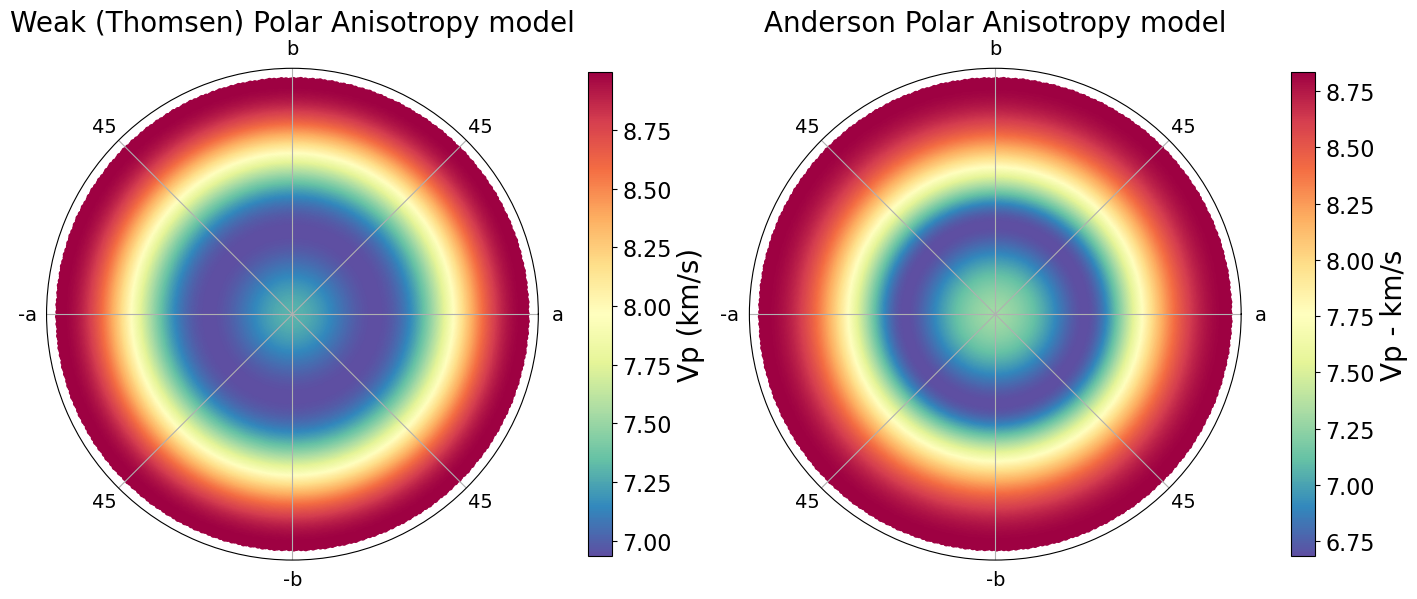

In [5]:
fig, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# Model 1
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax1.set_yticks([])
ax1.set_title('Weak (Thomsen) Polar Anisotropy model', fontsize=20)

cm = ax1.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vp'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Model 2
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax2.set_yticks([])
ax2.set_title('Anderson Polar Anisotropy model', fontsize=20)

cm = ax2.scatter(model2['azimuthal_ang'],
                 model2['polar_ang'],
                 c=model2['Vp'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vp - km/s', fontsize=20)
cbar.ax.tick_params(labelsize=16)

## Plot Vs1 and Vs2 as a function of orientation (Thomsen model)

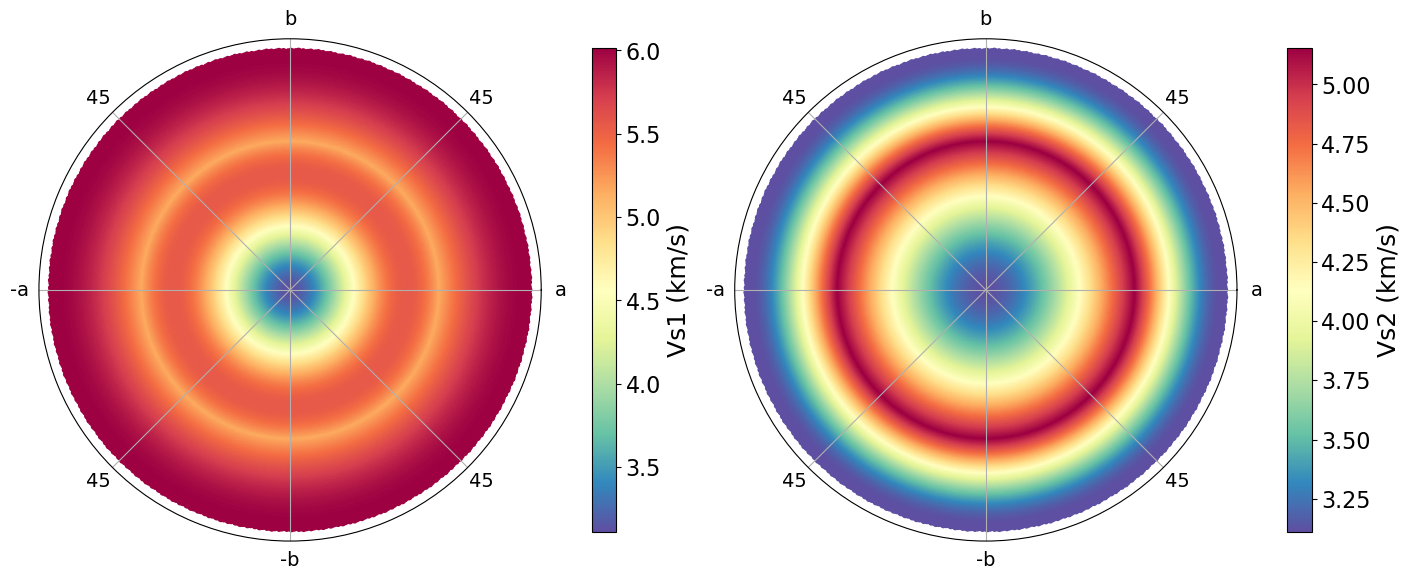

In [6]:
fig2, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# VS2 (slow)
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax1.set_yticks([])

cm = ax1.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vs1'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Vs1 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# VS1 (fast)
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax2.set_yticks([])

cm = ax2.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['Vs2'],
                 s=15,
                 cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Vs2 (km/s)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

## Polarization anisotropy in percentage

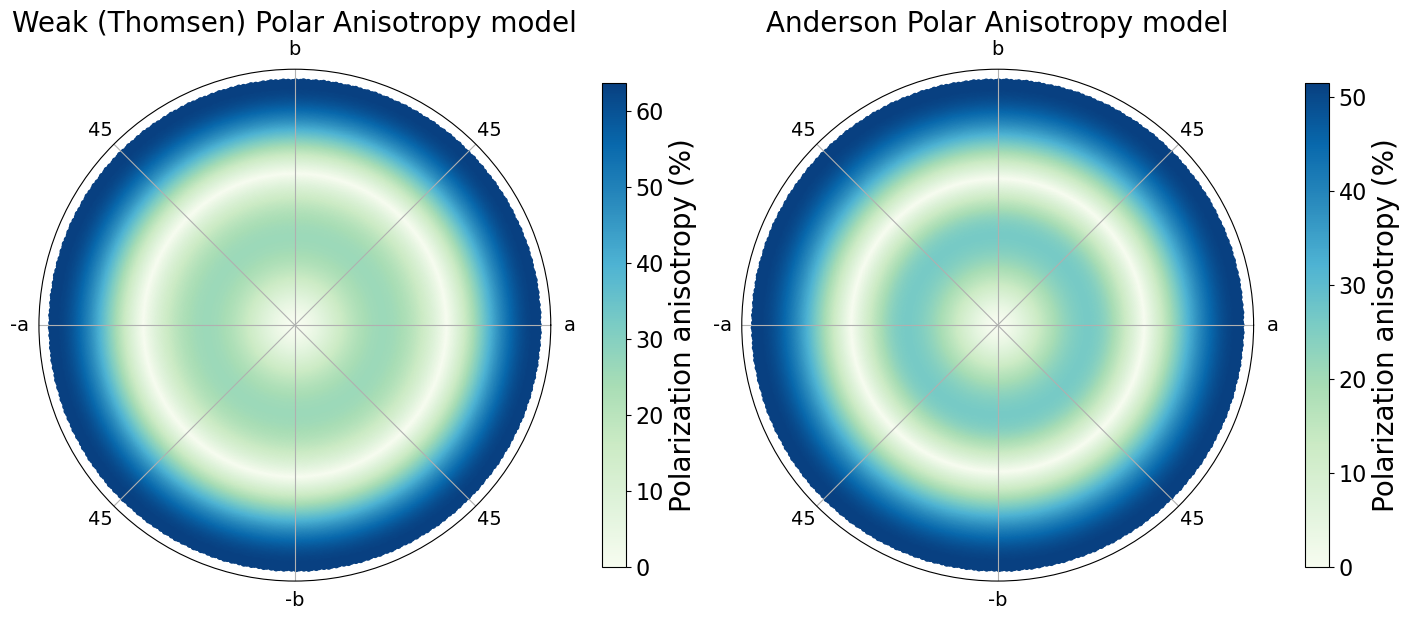

In [7]:
fig, (ax1, ax2) = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, ncols=2, figsize=(14,7))

# Model 1
ax1.set_theta_direction(-1)
ax1.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax1.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax1.set_yticks([])
ax1.set_title('Weak (Thomsen) Polar Anisotropy model', fontsize=20)

cm = ax1.scatter(model1['azimuthal_ang'],
                 model1['polar_ang'],
                 c=model1['SWS'],
                 s=15,
                 cmap='GnBu')

# add color bar
cbar = fig.colorbar(cm, ax=ax1, shrink=0.7, location='right')
cbar.set_label('Polarization anisotropy (%)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

# Model 2
ax2.set_theta_direction(-1)
ax2.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax2.set_xticklabels(['a', '45', '-b', '45', '-a', '45', 'b', '45'], fontsize=14)
ax2.set_yticks([])
ax2.set_title('Anderson Polar Anisotropy model', fontsize=20)

cm = ax2.scatter(model2['azimuthal_ang'],
                 model2['polar_ang'],
                 c=model2['SWS'],
                 s=15,
                 cmap='GnBu')

# add color bar
cbar = fig.colorbar(cm, ax=ax2, shrink=0.7, location='right')
cbar.set_label('Polarization anisotropy (%)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

In [8]:
import sys
import matplotlib as mpl
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)

Notebook tested in 2024-03-07 using:
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]
Numpy 1.26.4
Matplotlib 3.8.0
